Tugas Pemodelan & Optimasi : Simple RegresiLinear
Nama : Oka Mialtra
NIM : 2301222037

In [1]:
# Setup setting terkait dengan plotting
import numpy as np                 # import numpy (mathematical operation)
import matplotlib.pyplot as plt    # import package untuk plotting
from matplotlib import rcParams    # runtime configuration (rc)
rcParams['figure.figsize']    = (14,7)   # untuk membuat visualisasi lebih baik, modif parameter dibawah ini
rcParams['axes.spines.top']   = False
rcParams['axes.spines.right'] = False

In [2]:
# mendefinisikan SIMPLE LINEAR REGRESSION
class SimpleLinearRegression:
    '''
    A class which implements simple linear regression model
    '''
    def __init__(self):
        self.b0 = None
        self.b1 = None     # b0 dan b1 adalah variabel bebas dari garis yg kita cari

    def fit(self, X, y):   # ini tahapan untuk "training"
        ''' 
        Use calculus to calculate SLOPE and intercept Coefficients: y = b0 + b1x

        :param X: array, single feature
        :param y: array, true values
        :return: None    
        '''
        numerator   = np.sum( (X - np.mean(X))*(y - np.mean(y)) ) # formula pembilang
        denominator = np.sum((X - np.mean(X))**2 )                # formula pembagi
        self.b1     = numerator/denominator                       # lihat expresi ini dipenjelasan web nya
        self.b0     = np.mean(y) - self.b1*np.mean(X)              

    def predict(self, X): # untuk menghitung prediksi nilai y dengan input X
        '''
        Make predictions using the simple line equation
        :param X: array, single feature
        :return: None
        '''
        if not self.b0 or not self.b1:
            raise Exception('Please call `SimpleLinearRegression.fit(X,y)` before making predictions.')
        return self.b0 + self.b1*X

Mendefinisikan contoh data.
Data dibaca menggunakan pandas library.

In [39]:
import pandas as pd
sample_data=pd.read_csv("Salary_dataset.csv")
sample_data

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [4]:
X = sample_data["YearsExperience"]
y = sample_data["Salary"]

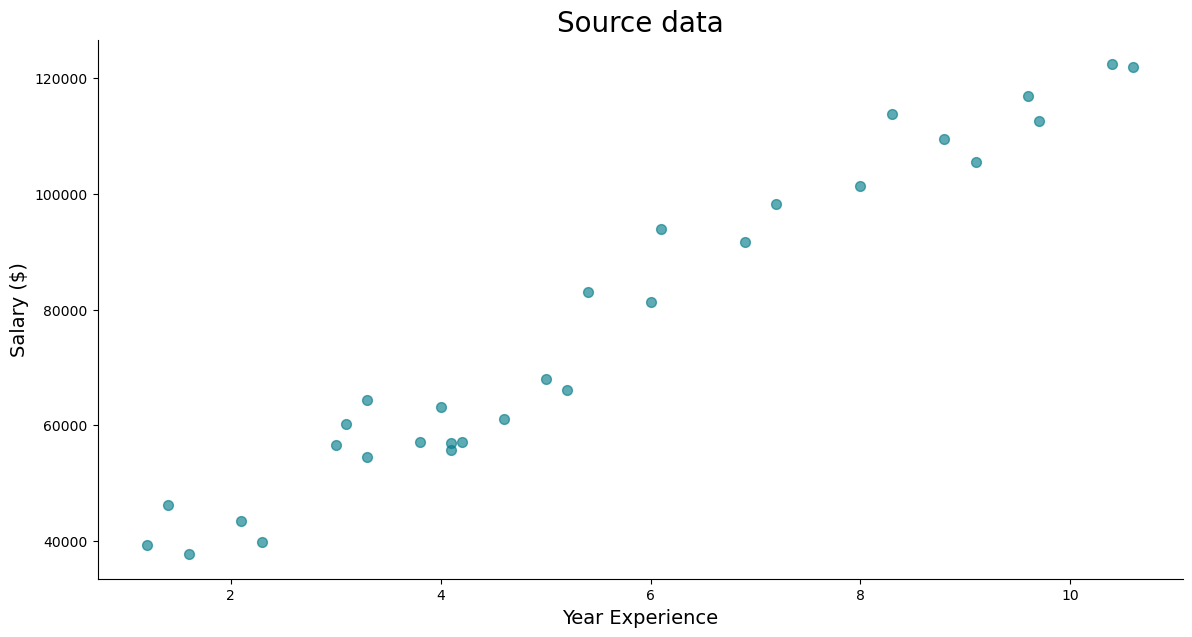

In [40]:
# plotting data
plt.scatter(X, y, s=50, c='#087E8B', alpha=0.65) # s=ukuranMarker, c=color, alpha=transparency
plt.title('Source data', size=20)                 # size= ukuran font
plt.xlabel('Year Experience', size=14)
plt.ylabel('Salary ($)', size=14)
plt.show()

In [41]:
# for validation, we split between training data and testing data
# use sklearn package
from sklearn.model_selection import train_test_split

# test = 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)



In [7]:
# Training testing process:
model     = SimpleLinearRegression()    # inialization process
model.fit(X_train, y_train)             # training process, output: coef b0 & b1
preds     = model.predict(X_test)       # prediction process, input: X_test, ouput: y_prediction

In [42]:
# menampilkan coef hasil training: b0 and b1
model.b0, model.b1

(24380.201479473697, 9423.815323030978)

In [43]:
# menampilkan prediction
preds

27    115791.210113
15     71499.278095
23    102597.868661
17     75268.804224
8      55478.792045
9      60190.699707
Name: YearsExperience, dtype: float64

In [44]:
y_test

27    112636.0
15     67939.0
23    113813.0
17     83089.0
8      64446.0
9      57190.0
Name: Salary, dtype: float64

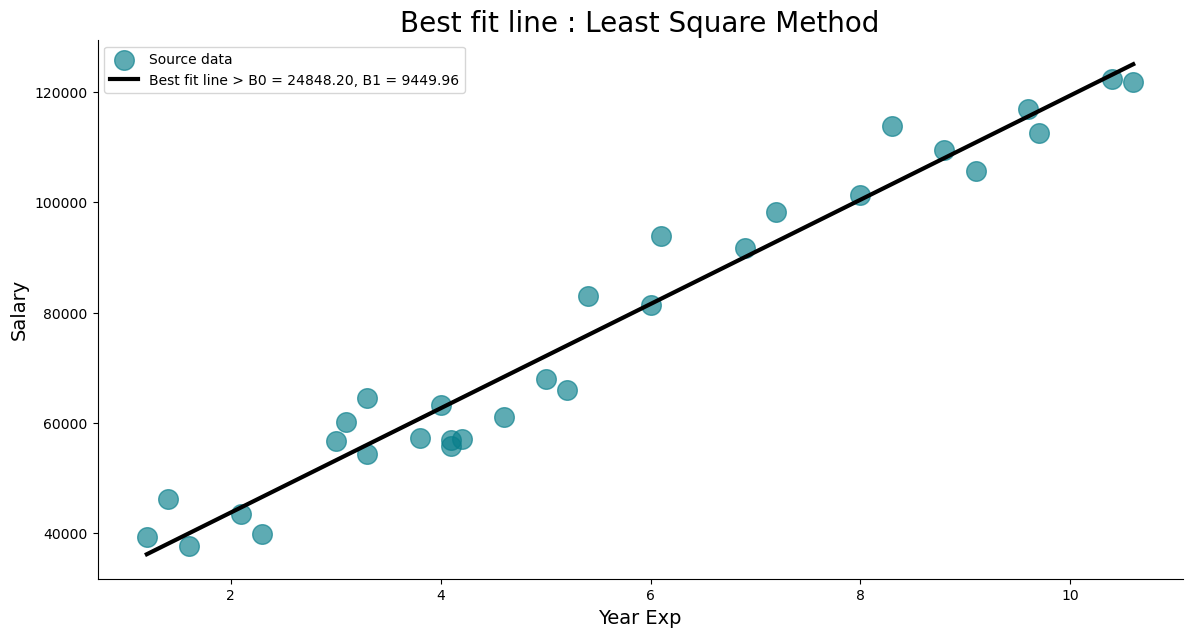

In [45]:
# VALIDATION ? 
# 1. Qualitatively --> visualization
# 2. Quantitative  --> RMSE, MAE, etc

# 1. QUALITATIVE
# Visualize the data, by using best fit line
model_all = SimpleLinearRegression()
model_all.fit(X,y)                       # bangun kembali model dengan semua data
preds_all = model_all.predict(X)         # membangun model prediksi

plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65, label='Source data')   # plot scatter
plt.plot(X, preds_all, color='#000000', lw=3, label=f'Best fit line > B0 = {model_all.b0:.2f}, B1 = {model_all.b1:.2f}')
plt.title('Best fit line : Least Square Method', size=20)
plt.xlabel('Year Exp', size=14)
plt.ylabel('Salary', size=14)
plt.legend()                 # menunjukkan label
plt.show()

In [46]:
# 2. QUANTITATIVE Comparison 
# now we will validate the predicted value with testing data using RMSE
from sklearn.metrics import mean_squared_error  # import rmse from sklearn
rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))   # definisikan y sbg variable?
rmse(y_test, preds)

7059.04362190151

In [47]:
# Now we will compare with SCIKIT-LEARN: LinearRegression
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()                               # initialization
sk_model.fit(np.array(X_train).reshape(-1,1), y_train)      # training the model
sk_preds = sk_model.predict(np.array(X_test).reshape(-1,1)) # testing process, input: testing data

sk_model.intercept_, sk_model.coef_     # show the output: b0 and b1 from the prediction

(24380.20147947369, array([9423.81532303]))

In [48]:
# hitung akurasi melalui RMSE untuk hasil dari SCIKIT-LEARN:
rmse(y_test, sk_preds)
# hasil nya hampir sama dengan perhitungan di atas.

7059.043621901506

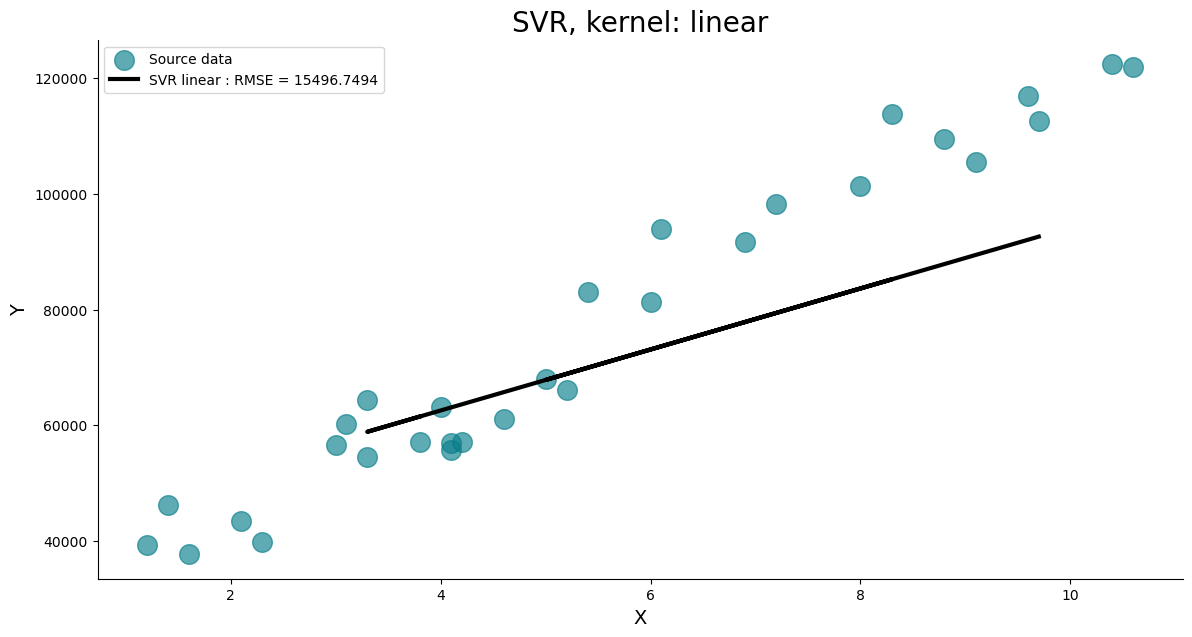

In [57]:
# Now we will playing with parameters in SVR - LINEAR
from sklearn.svm import SVR

# now we use linear kernel
svr_lin = SVR(kernel='linear', C=100, gamma=0.1, epsilon=.1) # SVR setting
svr_lin.fit(np.array(X_train).reshape(-1,1), y_train)        # training the model
svr_lin_preds = svr_lin.predict(np.array(X_test).reshape(-1,1)) # testing process, input: testing data

# hitung akurasi melalui RMSE untuk hasil dari SVR - SCIKIT-LEARN:
rmse_svrlin = rmse(y_test, svr_lin_preds)

# PLOTTING
plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65, label='Source data')   # plot scatter
plt.plot(X_test, svr_lin_preds, color='#000000', lw=3, label=f'SVR linear : RMSE = {rmse_svrlin:.4f}')
plt.title('SVR, kernel: linear', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.legend()                 # menunjukkan label
plt.show()


In [55]:
# hitung akurasi melalui RMSE untuk hasil dari SVR - SCIKIT-LEARN:
rmse(y_test, svr_lin_preds)

15496.749431562444

tes data 2 

In [ ]:

# test 2 = 10%
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=0.1, random_state=42)

In [17]:
# Training testing process:
model2     = SimpleLinearRegression()    # inialization process
model2.fit(X_train2, y_train2)             # training process, output: coef b0 & b1
preds2     = model.predict(X_test2)       # prediction process, input: X_test, ouput: y_prediction

In [18]:
# menampilkan coef hasil training: b0 and b1
model.b0, model.b1

(24380.201479473697, 9423.815323030978)

In [19]:
preds2

27    115791.210113
15     71499.278095
23    102597.868661
Name: YearsExperience, dtype: float64

In [21]:
y_test2

27    112636.0
15     67939.0
23    113813.0
Name: Salary, dtype: float64

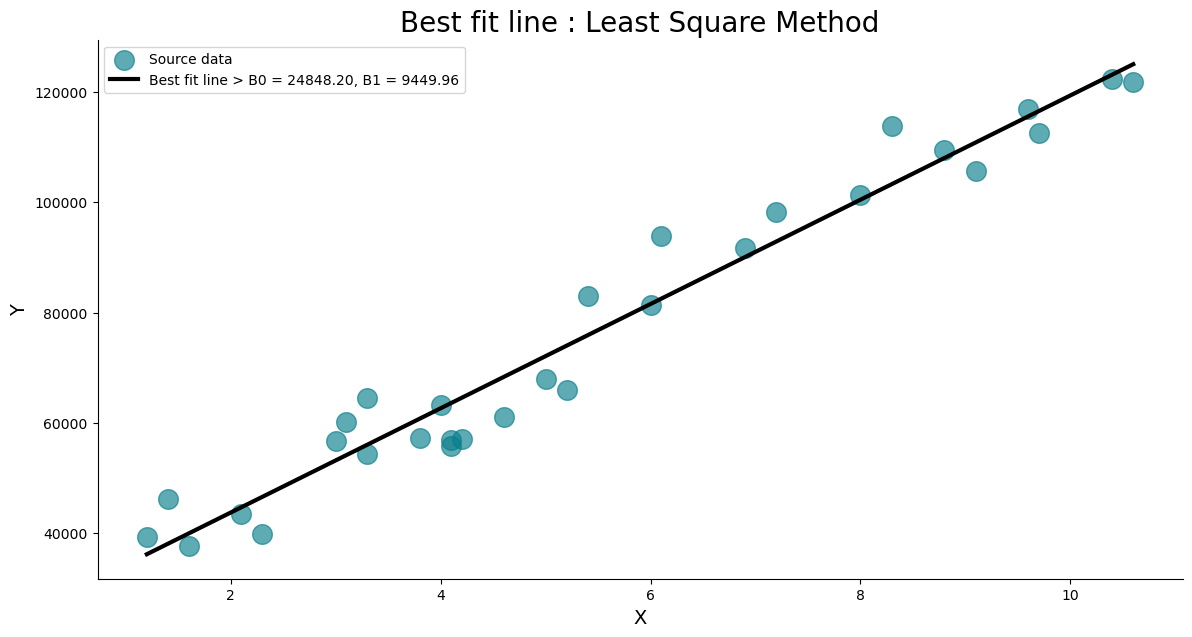

In [22]:
# 1. QUALITATIVE
# Visualize the data, by using best fit line
model_all = SimpleLinearRegression()
model_all.fit(X,y)                       # bangun kembali model dengan semua data
preds_all = model_all.predict(X)         # membangun model prediksi

plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65, label='Source data')   # plot scatter
plt.plot(X, preds_all, color='#000000', lw=3, label=f'Best fit line > B0 = {model_all.b0:.2f}, B1 = {model_all.b1:.2f}')
plt.title('Best fit line : Least Square Method', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.legend()                 # menunjukkan label
plt.show()

In [ ]:
pre

In [25]:
# 2. QUANTITATIVE Comparison 
# now we will validate the predicted value with testing data using RMSE
from sklearn.metrics import mean_squared_error  # import rmse from sklearn
rmse2 = lambda y, y_pred2: np.sqrt(mean_squared_error(y, y_pred2))   # definisikan y sbg variable?
rmse2(y_test2, preds2)

7033.493724714076

In [26]:
sk_model2 = LinearRegression()                               # initialization
sk_model2.fit(np.array(X_train2).reshape(-1,1), y_train2)      # training the model
sk_preds2 = sk_model2.predict(np.array(X_test2).reshape(-1,1)) # testing process, input: testing data

sk_model2.intercept_, sk_model2.coef_     # show the output: b0 and b1 from the prediction

(25161.88709088741, array([9371.31311726]))

In [29]:
# hitung akurasi melalui RMSE untuk hasil dari SCIKIT-LEARN:
rmse2(y_test2, sk_preds2)
# hasil nya hampir sama dengan perhitungan di atas.

6988.8090649421

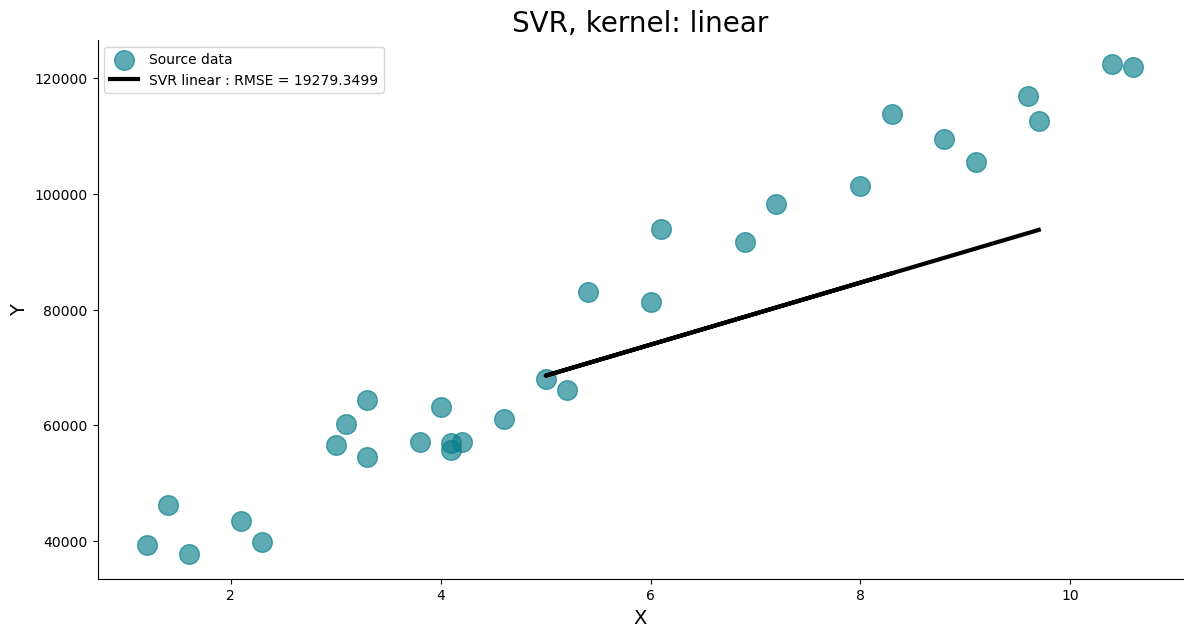

In [30]:

# now we use linear kernel
svr_lin2 = SVR(kernel='linear', C=100, gamma=0.1, epsilon=.1) # SVR setting
svr_lin2.fit(np.array(X_train2).reshape(-1,1), y_train2)        # training the model
svr_lin_preds2 = svr_lin2.predict(np.array(X_test2).reshape(-1,1)) # testing process, input: testing data

# hitung akurasi melalui RMSE untuk hasil dari SVR - SCIKIT-LEARN:
rmse_svrlin2 = rmse2(y_test2, svr_lin_preds2)

# PLOTTING
plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65, label='Source data')   # plot scatter
plt.plot(X_test2, svr_lin_preds2, color='#000000', lw=3, label=f'SVR linear : RMSE = {rmse_svrlin2:.4f}')
plt.title('SVR, kernel: linear', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.legend()                 # menunjukkan label
plt.show()


In [31]:
# hitung akurasi melalui RMSE untuk hasil dari SVR - SCIKIT-LEARN:
rmse2(y_test2, svr_lin_preds2)

19279.34990794407